# 단순 선형회귀

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 아버지와 아들의 키 - Galton

In [5]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


- 아버지와 아들의 키만 발췌

In [3]:
# Filtering
df = df[df.Gender == 'M']
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
4,2,75.5,66.5,M,73.5,4
5,2,75.5,66.5,M,72.5,4
8,3,75.0,64.0,M,71.0,2
10,4,75.0,64.0,M,70.5,5


In [4]:
# Selection
df = df[['Father','Height']]
df.head(3)

,Father,Height
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5


In [6]:
# Filtering & Selection을 한 줄로 처리
df = df[df.Gender == 'M'][['Father','Height']]
df.head(3)

,Father,Height
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5


In [7]:
# 'Height' 컬럼을 'Son'으로 변경
df.rename(columns={'Height': 'Son'}, inplace=True)
df.head(3)

,Father,Son
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5


In [8]:
# inch 를 cm 으로 
df = df * 2.54
df.head(3)

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150


- 산점도 그리기

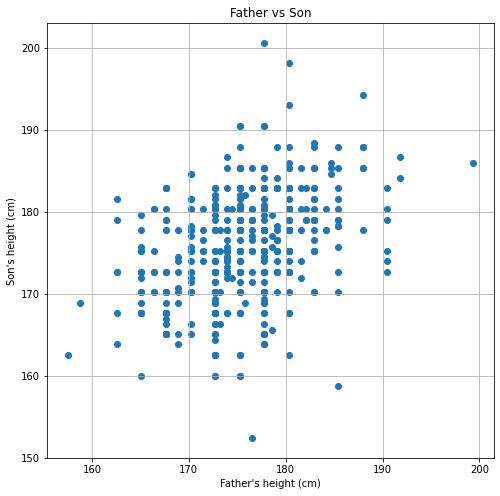

In [10]:
plt.figure(figsize=(8,8))
plt.scatter(df.Father, df.Son)
plt.grid()
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title('Father vs Son')
plt.show()

- 회귀선 구하기: Numpy polyfit

In [11]:
fp1 = np.polyfit(df.Father, df.Son, 1)      # 1차식으로 아버지와 아들의 키 관계
fp1                                         # 기울기, 절편

array([ 0.44774792, 97.17763701])

In [13]:
x = np.array([156,201])
y = fp1[0]*x + fp1[1]
y

array([167.02631215, 187.17496845])

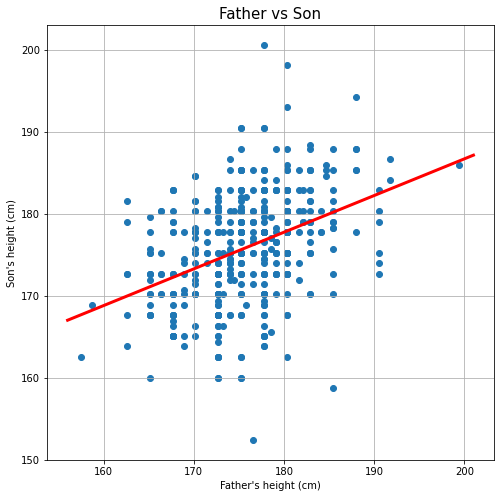

In [16]:
plt.figure(figsize=(8,8))
plt.scatter(df.Father, df.Son)
plt.plot(x, y, 'r-', lw=3)
plt.grid()
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title('Father vs Son', fontsize=15)
plt.show()

- Scikit-Learn

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
# X의 shape 1차원 --> 2차원으로 바꿔주어야 함
df.Father.values.shape

(465,)

In [20]:
lr = LinearRegression()
lr.fit(df.Father.values.reshape(-1,1), df.Son.values)

LinearRegression()

In [21]:
# 기울기
lr.coef_

array([0.44774792])

In [22]:
# 절편
lr.intercept_

97.17763700739346

In [23]:
# 잔차 제곱의 합 (RSS: Residual Sum of Square)
lr._residues

17556.59951549399

In [24]:
# R squared - 성능 평가 요소
lr.score(df.Father.values.reshape(-1,1), df.Son.values)

0.15312927478306992